# Proyek Akhir:Understanding-and-Predicting-Employee-Turnover-at-Jaya-Jaya-Maju

 - Nama: Wildan Fadhil Nazaruddin
 - Email: wildanfadhil76@gmail.com
 - Id Dicoding:

### Persiapan

## Menyiapkan library yang dibutuhkan

In [3]:
# Manipulasi Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import os

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Save Model
import pickle

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [4]:
# import dataset
df = pd.read_csv('../employee_data.csv')

## Data Understanding

Adapun kolom-kolom yang terdapat pada dataset adalah sebagai berikut:

| Kolom                     | Deskripsi                                                                                   |
|---------------------------|--------------------------------------------------------------------------------------------|
| **EmployeeId**            | ID Karyawan.                                                                               |
| **Attrition**             | Apakah terjadi pengurangan karyawan? (0 = tidak, 1 = ya).                                  |
| **Age**                   | Usia karyawan.                                                                             |
| **BusinessTravel**        | Komitmen perjalanan untuk pekerjaan.                                                       |
| **DailyRate**             | Gaji harian.                                                                               |
| **Department**            | Departemen Karyawan.                                                                       |
| **DistanceFromHome**      | Jarak dari tempat kerja ke rumah (dalam km).                                               |
| **Education**             | 1-SMP, 2-SMA, 3-Sarjana, 4-Magister, 5-Doktor.                                            |
| **EducationField**        | Bidang Pendidikan.                                                                         |
| **EnvironmentSatisfaction** | 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi.                                           |
| **Gender**                | Jenis kelamin karyawan.                                                                    |
| **HourlyRate**            | Gaji per jam.                                                                              |
| **JobInvolvement**        | 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi.                                             |
| **JobLevel**              | Tingkat pekerjaan (1 hingga 5).                                                            |
| **JobRole**               | Peran Pekerjaan.                                                                           |
| **JobSatisfaction**       | 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi.                                             |
| **MaritalStatus**         | Status Pernikahan.                                                                         |
| **MonthlyIncome**         | Gaji bulanan.                                                                              |
| **MonthlyRate**           | Tarif per bulan.                                                                           |
| **NumCompaniesWorked**    | Jumlah perusahaan tempat bekerja.                                                          |
| **Over18**                | Berusia di atas 18 tahun?                                                                  |
| **OverTime**              | Lembur?                                                                                    |
| **PercentSalaryHike**     | Persentase kenaikan gaji tahun lalu.                                                       |
| **PerformanceRating**     | 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa.                                            |
| **RelationshipSatisfaction** | 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi.                                         |
| **StandardHours**         | Jam Standar.                                                                               |
| **StockOptionLevel**      | Tingkat Opsi Saham.                                                                        |
| **TotalWorkingYears**     | Total tahun bekerja.                                                                       |
| **TrainingTimesLastYear** | Jumlah pelatihan yang diikuti tahun lalu.                                                  |
| **WorkLifeBalance**       | 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Sangat Baik.                                            |
| **YearsAtCompany**        | Tahun di Perusahaan.                                                                       |
| **YearsInCurrentRole**    | Tahun dalam peran saat ini.                                                                |
| **YearsSinceLastPromotion** | Tahun sejak promosi terakhir.                                                            |
| **YearsWithCurrManager**  | Tahun dengan manajer saat ini.                                                             |

In [8]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)
# melihat sample data
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [9]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Seluruh tipe data sudah sesuai, tetapi ada satu fitur di mana tipe data pada kolom Attrition akan diubah menjadi int.

In [19]:
# melihat missing value
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

terdapat missing valeu pada kolom attrion sebanyak 412

In [25]:
# melihat duplikat data
df.duplicated().sum()

np.int64(0)

tidak terdapat nilai duplikasi

In [17]:
# statistik deskriptif
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- jumlah karyawan di perusahaan jaya jaya maju adalah 1470 karyawan

In [11]:
# melihat nilai untuk kolom attrition
df['Attrition'].value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

Berdasarkan hasil eksplorasi data pada kolom `Attrition`, didapatkan bahwa sebanyak **879 karyawan tidak mengalami attrition** (tetap bekerja di perusahaan), sedangkan **179 karyawan mengalami attrition** (keluar dari perusahaan). Hal ini menunjukkan bahwa mayoritas karyawan di perusahaan Jaya Jaya Maju masih bertahan, namun terdapat sejumlah karyawan yang keluar sehingga perlu dianalisis lebih lanjut faktor-faktor yang mempengaruhi attrition tersebut.

Rata-rata usia karyawan di perusahaan Jaya Jaya Maju adalah sekitar **36,9 tahun**. Hal ini menunjukkan bahwa mayoritas karyawan berada pada rentang usia produktif, yang umumnya memiliki tingkat energi dan motivasi kerja yang tinggi. Usia rata-rata ini juga dapat menjadi pertimbangan dalam merancang program pengembangan karir, pelatihan, serta kebijakan perusahaan yang relevan dengan kebutuhan dan preferensi karyawan di usia tersebut.

Rata-rata gaji harian karyawan di perusahaan Jaya Jaya Maju adalah sekitar $802.49. Nilai ini memberikan gambaran mengenai kompensasi harian yang diterima karyawan, yang dapat digunakan sebagai acuan dalam mengevaluasi kebijakan penggajian perusahaan. Gaji harian yang kompetitif dapat meningkatkan kepuasan dan motivasi kerja karyawan, serta membantu perusahaan dalam mempertahankan talenta terbaik. Namun, perlu juga dilakukan analisis lebih lanjut untuk melihat distribusi gaji harian di berbagai departemen atau level jabatan guna memastikan keadilan dan keseimbangan dalam sistem remunerasi perusahaan.

Rata-rata jarak rumah ke tempat kerja karyawan di perusahaan Jaya Jaya Maju adalah sekitar **9,19 km**. Jarak ini relatif dekat, sehingga dapat meminimalisir kelelahan akibat perjalanan dan meningkatkan produktivitas kerja. Selain itu, jarak tempuh yang tidak terlalu jauh juga dapat berkontribusi pada work-life balance yang lebih baik bagi karyawan. Namun, perusahaan tetap perlu memperhatikan kebutuhan transportasi dan fleksibilitas kerja untuk mendukung kenyamanan karyawan.


Kolom `StandardHours` pada dataset memiliki nilai rata-rata **80.0** untuk seluruh karyawan. Hal ini menunjukkan bahwa seluruh karyawan di perusahaan Jaya Jaya Maju memiliki jumlah jam kerja standar yang sama, yaitu 80 jam (kemungkinan per periode tertentu, misal per dua minggu). Karena tidak ada variasi pada kolom ini, fitur `StandardHours` tidak memberikan informasi yang membedakan antar karyawan dan kemungkinan besar tidak akan berkontribusi signifikan dalam proses analisis atau pemodelan prediksi turnover. Kolom ini dapat dipertimbangkan untuk dihapus pada tahap preprocessing data.

In [13]:
# melihat nilai untuk kolom BusinessTravel
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

```markdown
Berdasarkan distribusi pada kolom `BusinessTravel`, mayoritas karyawan di perusahaan Jaya Jaya Maju jarang melakukan perjalanan dinas (`Travel_Rarely`) sebanyak **1043 orang**. Sementara itu, terdapat **277 karyawan** yang sering melakukan perjalanan dinas (`Travel_Frequently`), dan **150 karyawan** yang tidak pernah melakukan perjalanan dinas sama sekali (`Non-Travel`). Hal ini menunjukkan bahwa sebagian besar karyawan tidak terlalu sering bepergian untuk urusan pekerjaan, yang dapat berpengaruh terhadap work-life balance dan tingkat kepuasan kerja karyawan.
```

Rata-rata gaji per jam karyawan di perusahaan Jaya Jaya Maju adalah sekitar **$65.89**. Nilai ini menunjukkan bahwa perusahaan memberikan kompensasi per jam yang cukup kompetitif di pasar tenaga kerja. Gaji per jam yang memadai dapat meningkatkan motivasi dan produktivitas karyawan, serta membantu perusahaan dalam mempertahankan talenta terbaik. Namun, perlu juga dilakukan analisis lebih lanjut untuk memastikan bahwa distribusi gaji per jam sudah adil di seluruh departemen dan level jabatan.

Rata-rata gaji bulanan (MonthlyIncome) karyawan di perusahaan Jaya Jaya Maju adalah sekitar **$6,502.93**. Nilai ini memberikan gambaran mengenai tingkat kompensasi bulanan yang diterima karyawan, yang dapat digunakan sebagai acuan dalam evaluasi kebijakan penggajian dan kesejahteraan karyawan. Gaji bulanan yang kompetitif dapat meningkatkan motivasi, kepuasan kerja, serta membantu perusahaan dalam mempertahankan talenta terbaik. Namun, analisis lebih lanjut diperlukan untuk memastikan distribusi gaji yang adil di seluruh departemen dan level jabatan.

**Rata-rata MonthlyRate Karyawan**

Rata-rata nilai `MonthlyRate` (tarif per bulan) karyawan di perusahaan Jaya Jaya Maju adalah sekitar **$14,313.10**. Nilai ini memberikan gambaran mengenai tarif bulanan yang diterima karyawan, yang dapat digunakan sebagai acuan dalam evaluasi kebijakan penggajian dan kesejahteraan karyawan. Tarif bulanan yang kompetitif dapat meningkatkan motivasi, kepuasan kerja, serta membantu perusahaan dalam mempertahankan talenta terbaik. Namun, analisis lebih lanjut diperlukan untuk memastikan distribusi tarif yang adil di seluruh departemen dan level jabatan.

**Rata-rata Masa Kerja di Perusahaan**

Rata-rata masa kerja karyawan di perusahaan Jaya Jaya Maju adalah sekitar **7 tahun**. Hal ini menunjukkan tingkat retensi karyawan yang cukup baik, di mana sebagian besar karyawan telah bekerja dalam jangka waktu yang relatif lama. Masa kerja yang panjang dapat mencerminkan kepuasan kerja, loyalitas, serta efektivitas program pengembangan karir di perusahaan. Namun, perusahaan juga perlu memperhatikan faktor-faktor yang dapat meningkatkan retensi, terutama bagi karyawan baru agar dapat bertahan lebih lama di perusahaan.

**Rata-rata Masa Jabatan dalam Peran Saat Ini**

Rata-rata masa jabatan karyawan dalam peran saat ini (`YearsInCurrentRole`) di perusahaan Jaya Jaya Maju adalah sekitar **4,23 tahun**. Hal ini menunjukkan bahwa, secara umum, karyawan telah menempati posisi atau peran mereka selama lebih dari 4 tahun. Masa jabatan yang relatif lama dalam satu peran dapat mencerminkan stabilitas, pengalaman, dan keahlian yang dimiliki karyawan di bidangnya. Namun, perusahaan juga perlu memperhatikan peluang pengembangan karir dan rotasi jabatan agar karyawan tetap termotivasi dan berkembang.

**Rata-rata Tahun Sejak Promosi Terakhir**

Rata-rata tahun sejak promosi terakhir (`YearsSinceLastPromotion`) karyawan di perusahaan Jaya Jaya Maju adalah sekitar **2,19 tahun**. Nilai ini menunjukkan bahwa, secara umum, karyawan terakhir kali mendapatkan promosi sekitar dua tahun yang lalu. Informasi ini dapat digunakan perusahaan untuk mengevaluasi kebijakan promosi dan memastikan adanya peluang pengembangan karir yang adil dan merata bagi seluruh karyawan.

**Rata-rata Tahun Bersama Manajer Saat Ini**

Rata-rata tahun karyawan bersama manajer saat ini (`YearsWithCurrManager`) di perusahaan Jaya Jaya Maju adalah sekitar **4,12 tahun**. Hal ini menunjukkan bahwa, secara umum, karyawan telah bekerja dengan manajer mereka dalam jangka waktu yang cukup lama. Hubungan kerja yang stabil dengan manajer dapat berkontribusi pada peningkatan kinerja, kepuasan kerja, dan retensi karyawan. Namun, perusahaan juga perlu memastikan adanya komunikasi yang efektif dan dukungan dari manajer untuk menciptakan lingkungan kerja yang kondusif dan produktif.

In [20]:
# menampilkan jumlah nilai pada kolom department
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Mayoritas karyawan di perusahaan Jaya Jaya Maju berada di departemen Research & Development dengan jumlah 961 orang. Departemen Sales menempati posisi kedua dengan 446 karyawan, sedangkan Human Resources memiliki jumlah karyawan paling sedikit, yaitu 63 orang. Distribusi ini menunjukkan bahwa perusahaan sangat berfokus pada pengembangan produk dan riset, sementara kebutuhan tenaga kerja di bidang penjualan dan sumber daya manusia relatif lebih kecil. Hal ini dapat menjadi pertimbangan dalam perencanaan rekrutmen, pengembangan karir, serta alokasi sumber daya di masing-masing departemen.

In [21]:
# melihat jumlah dari kolom education
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

Berdasarkan distribusi tingkat pendidikan karyawan di perusahaan Jaya Jaya Maju:

- **Sebagian besar karyawan merupakan lulusan Sarjana (S1 dan S2)**, dengan total 970 orang (572 S1 dan 398 S2).
- Lulusan **Sekolah Menengah Atas (SMA)** berjumlah 282 orang, sedangkan **Sekolah Menengah Pertama (SMP)** sebanyak 170 orang.
- **Lulusan Doktor (S3)** merupakan yang paling sedikit, hanya 48 orang.

Hal ini menunjukkan bahwa perusahaan lebih banyak merekrut karyawan dengan latar belakang pendidikan tinggi, terutama Sarjana, yang kemungkinan besar sesuai dengan kebutuhan kompetensi dan spesialisasi di perusahaan. Namun, tetap terdapat keberagaman tingkat pendidikan yang dapat memperkaya perspektif dan dinamika kerja di lingkungan perusahaan.

In [22]:
# melihat jumlah data dari kolom education field
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Distribusi bidang pendidikan (`EducationField`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Life Sciences**: 606 karyawan
- **Medical**: 464 karyawan
- **Marketing**: 159 karyawan
- **Technical Degree**: 132 karyawan
- **Other**: 82 karyawan
- **Human Resources**: 27 karyawan

Mayoritas karyawan berasal dari bidang Life Sciences dan Medical, yang menunjukkan kebutuhan perusahaan terhadap keahlian di bidang tersebut. Sementara itu, bidang Human Resources memiliki jumlah karyawan paling sedikit. Keberagaman bidang pendidikan ini dapat memperkaya perspektif dan inovasi di lingkungan kerja.

In [23]:
# melihat nilai data untuk kolom EnvironmentSatisfaction
df['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

Distribusi tingkat kepuasan lingkungan kerja (`EnvironmentSatisfaction`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Tinggi (3)**: 453 karyawan
- **Sangat Tinggi (4)**: 446 karyawan
- **Sedang (2)**: 287 karyawan
- **Rendah (1)**: 284 karyawan

Mayoritas karyawan merasa puas dengan lingkungan kerja mereka (tingkat 3 dan 4), yang menunjukkan bahwa lingkungan kerja di perusahaan cukup baik dan mendukung. Namun, masih terdapat sejumlah karyawan dengan tingkat kepuasan sedang hingga rendah, sehingga perusahaan perlu memperhatikan faktor-faktor yang dapat meningkatkan kepuasan lingkungan kerja secara menyeluruh.


In [24]:
# melihat jumlah data gender
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

Distribusi gender karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Laki-laki (Male)**: 882 karyawan
- **Perempuan (Female)**: 588 karyawan

Hal ini menunjukkan bahwa proporsi karyawan laki-laki lebih banyak dibandingkan perempuan. Perusahaan dapat mempertimbangkan kebijakan yang mendukung kesetaraan gender dan menciptakan lingkungan kerja yang inklusif untuk seluruh karyawan.

In [5]:
# melihat nilai data untuk kolom JobInvolvement
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

Distribusi tingkat keterlibatan kerja (`JobInvolvement`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Tinggi (3)**: 868 karyawan
- **Sedang (2)**: 375 karyawan
- **Sangat Tinggi (4)**: 144 karyawan
- **Rendah (1)**: 83 karyawan

Mayoritas karyawan memiliki tingkat keterlibatan kerja yang tinggi, yang menunjukkan bahwa sebagian besar karyawan merasa terlibat dan berkontribusi secara aktif dalam pekerjaan mereka. Namun, masih terdapat sejumlah karyawan dengan tingkat keterlibatan sedang hingga rendah. Perusahaan dapat melakukan evaluasi lebih lanjut untuk meningkatkan keterlibatan kerja, terutama pada kelompok dengan tingkat keterlibatan rendah, guna meningkatkan produktivitas dan retensi karyawan.

In [6]:
# melihat nilai data untuk kolom Joblevel
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

Distribusi tingkat jabatan (`JobLevel`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Level 1**: 543 karyawan
- **Level 2**: 534 karyawan
- **Level 3**: 218 karyawan
- **Level 4**: 106 karyawan
- **Level 5**: 69 karyawan

Mayoritas karyawan berada pada level jabatan 1 dan 2, yang menunjukkan bahwa struktur organisasi perusahaan didominasi oleh posisi entry-level dan menengah. Jumlah karyawan semakin sedikit pada level jabatan yang lebih tinggi, mencerminkan struktur piramida yang umum pada banyak organisasi. Hal ini dapat menjadi pertimbangan dalam perencanaan pengembangan karir, promosi, serta kebutuhan pelatihan untuk mempersiapkan karyawan menuju level jabatan yang lebih tinggi.

In [7]:
# melihat nilai data untuk kolom job role
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

Distribusi peran pekerjaan (`JobRole`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Sales Executive**: 326 karyawan
- **Research Scientist**: 292 karyawan
- **Laboratory Technician**: 259 karyawan
- **Manufacturing Director**: 145 karyawan
- **Healthcare Representative**: 131 karyawan
- **Manager**: 102 karyawan
- **Sales Representative**: 83 karyawan
- **Research Director**: 80 karyawan
- **Human Resources**: 52 karyawan

Mayoritas karyawan menempati posisi Sales Executive dan Research Scientist, yang menunjukkan fokus perusahaan pada penjualan dan riset. Posisi Human Resources memiliki jumlah karyawan paling sedikit, menandakan kebutuhan yang lebih kecil di bidang tersebut. Distribusi ini dapat menjadi dasar dalam perencanaan pengembangan karir, pelatihan, dan rekrutmen sesuai kebutuhan masing-masing peran di perusahaan.

In [8]:
# melihat nilai data untuk kolom JobStatisfaction
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

Distribusi tingkat kepuasan kerja (`JobSatisfaction`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Sangat Tinggi (4)**: 459 karyawan
- **Tinggi (3)**: 442 karyawan
- **Rendah (1)**: 289 karyawan
- **Sedang (2)**: 280 karyawan

Mayoritas karyawan merasa sangat puas atau puas dengan pekerjaannya. Namun, masih terdapat sejumlah karyawan dengan tingkat kepuasan rendah hingga sedang. Perusahaan dapat melakukan evaluasi lebih lanjut untuk meningkatkan kepuasan kerja secara menyeluruh, terutama pada kelompok dengan tingkat kepuasan rendah.

In [9]:
# melihat nilai data untuk koolom MaritalStatus
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Distribusi status pernikahan (`MaritalStatus`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Menikah (Married)**: 673 karyawan
- **Lajang (Single)**: 470 karyawan
- **Cerai (Divorced)**: 327 karyawan

Mayoritas karyawan berstatus menikah, diikuti oleh karyawan lajang dan cerai. Informasi ini dapat digunakan perusahaan untuk merancang kebijakan kesejahteraan dan program kerja yang sesuai dengan kebutuhan masing-masing kelompok.

In [13]:
# melihat nilai data untuk kolom NumberOfCompaniesWorked
df['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

Distribusi jumlah perusahaan tempat karyawan pernah bekerja (`NumCompaniesWorked`) di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **1 perusahaan**: 521 karyawan
- **0 perusahaan**: 197 karyawan (kemungkinan merupakan pekerjaan pertama)
- **3 perusahaan**: 159 karyawan
- **2 perusahaan**: 146 karyawan
- **4 perusahaan**: 139 karyawan
- **7 perusahaan**: 74 karyawan
- **6 perusahaan**: 70 karyawan
- **5 perusahaan**: 63 karyawan
- **9 perusahaan**: 52 karyawan
- **8 perusahaan**: 49 karyawan

Mayoritas karyawan pernah bekerja di 1 perusahaan sebelumnya, diikuti oleh mereka yang baru pertama kali bekerja. Hal ini menunjukkan bahwa sebagian besar karyawan memiliki pengalaman kerja di satu atau dua perusahaan sebelum bergabung dengan Jaya Jaya Maju.

In [15]:
# melihat nilai data untuk kolom Overtime
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

Distribusi lembur (`OverTime`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Tidak lembur (No)**: 1.054 karyawan
- **Lembur (Yes)**: 416 karyawan

Mayoritas karyawan tidak melakukan lembur. Hal ini dapat mencerminkan efektivitas manajemen waktu kerja di perusahaan, namun perlu juga dianalisis lebih lanjut apakah beban kerja sudah merata dan tidak menimbulkan kelelahan pada karyawan yang sering lembur.

In [16]:
# melihat nilai data untuk kolom percentage salary hike
df['PercentSalaryHike'].value_counts()

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

Distribusi nilai pada kolom `PercentSalaryHike` menunjukkan bahwa sebagian besar karyawan menerima kenaikan gaji di kisaran 11% hingga 15%. Berikut adalah rincian jumlah karyawan berdasarkan persentase kenaikan gaji:

- **11%**: 210 karyawan
- **13%**: 209 karyawan
- **14%**: 201 karyawan
- **12%**: 198 karyawan
- **15%**: 101 karyawan
- **18%**: 89 karyawan
- **17%**: 82 karyawan
- **16%**: 78 karyawan
- **19%**: 76 karyawan
- **22%**: 56 karyawan
- **20%**: 55 karyawan
- **21%**: 48 karyawan
- **23%**: 28 karyawan
- **24%**: 21 karyawan
- **25%**: 18 karyawan

Mayoritas karyawan mendapatkan kenaikan gaji di bawah 20%, dengan sedikit karyawan yang menerima kenaikan di atas angka tersebut. Informasi ini dapat digunakan untuk mengevaluasi kebijakan kenaikan gaji dan memastikan keadilan serta daya saing kompensasi di perusahaan.

In [17]:
# melihat nilai data untuk kolom JobInvolvemen
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

Distribusi nilai pada kolom `PerformanceRating` karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Rating 3 (Sangat Baik)**: 1.244 karyawan
- **Rating 4 (Luar Biasa)**: 226 karyawan

Mayoritas karyawan mendapatkan penilaian kinerja pada level "Sangat Baik", sedangkan sebagian kecil memperoleh rating "Luar Biasa". Hal ini menunjukkan bahwa sebagian besar karyawan memiliki performa kerja yang sangat baik, namun hanya sedikit yang mencapai level performa tertinggi. Perusahaan dapat melakukan evaluasi lebih lanjut untuk memahami faktor-faktor yang mendorong karyawan mencapai rating tertinggi dan mengembangkan program pengembangan kinerja yang sesuai.

In [18]:
# melihat nilai data untuk kolom RelationshipSatisfaction
df['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

Distribusi tingkat kepuasan hubungan kerja (`RelationshipSatisfaction`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Tinggi (3)**: 459 karyawan
- **Sangat Tinggi (4)**: 432 karyawan
- **Sedang (2)**: 303 karyawan
- **Rendah (1)**: 276 karyawan

Mayoritas karyawan merasa puas atau sangat puas dengan hubungan kerja mereka. Namun, masih terdapat sejumlah karyawan dengan tingkat kepuasan sedang hingga rendah. Perusahaan dapat melakukan evaluasi lebih lanjut untuk meningkatkan kepuasan hubungan kerja secara menyeluruh, terutama pada kelompok dengan tingkat kepuasan rendah.

In [19]:
# melihat nilai data untuk kolom stock option level
df['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

Distribusi tingkat opsi saham (`StockOptionLevel`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Level 0**: 631 karyawan
- **Level 1**: 596 karyawan
- **Level 2**: 158 karyawan
- **Level 3**: 85 karyawan

Mayoritas karyawan berada pada level opsi saham 0 dan 1. Hal ini menunjukkan bahwa sebagian besar karyawan memiliki akses terbatas atau tidak memiliki opsi saham, sementara hanya sebagian kecil yang berada pada level opsi saham yang lebih tinggi. Perusahaan dapat mempertimbangkan strategi pemberian opsi saham sebagai salah satu bentuk insentif untuk meningkatkan retensi dan motivasi karyawan.

In [21]:
# melihat nilai data untuk kolom training times last year
df['TrainingTimesLastYear'].value_counts()

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64

Distribusi jumlah pelatihan yang diikuti karyawan selama setahun terakhir (`TrainingTimesLastYear`) di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **2 kali**: 547 karyawan
- **3 kali**: 491 karyawan
- **4 kali**: 123 karyawan
- **5 kali**: 119 karyawan
- **1 kali**: 71 karyawan
- **6 kali**: 65 karyawan
- **0 kali**: 54 karyawan

Mayoritas karyawan mengikuti pelatihan sebanyak 2 hingga 3 kali dalam setahun. Hal ini menunjukkan adanya upaya perusahaan dalam meningkatkan kompetensi karyawan melalui program pelatihan yang rutin. Namun, terdapat juga sejumlah karyawan yang tidak mengikuti pelatihan sama sekali, sehingga perusahaan dapat mempertimbangkan strategi untuk meningkatkan partisipasi pelatihan secara merata di seluruh karyawan.

In [22]:
# melihat nilai data untuk kolom work life balance
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

Distribusi tingkat keseimbangan kehidupan kerja (`WorkLifeBalance`) karyawan di perusahaan Jaya Jaya Maju adalah sebagai berikut:

- **Baik (3)**: 893 karyawan
- **Sangat Baik (4)**: 153 karyawan
- **Sedang (2)**: 344 karyawan
- **Rendah (1)**: 80 karyawan

Mayoritas karyawan menilai keseimbangan kehidupan kerja mereka pada tingkat "Baik" dan "Sangat Baik". Namun, masih terdapat sejumlah karyawan yang merasa keseimbangan kehidupan kerja mereka sedang hingga rendah. Perusahaan dapat mempertimbangkan kebijakan dan program yang mendukung peningkatan work-life balance untuk seluruh karyawan.

## EDA

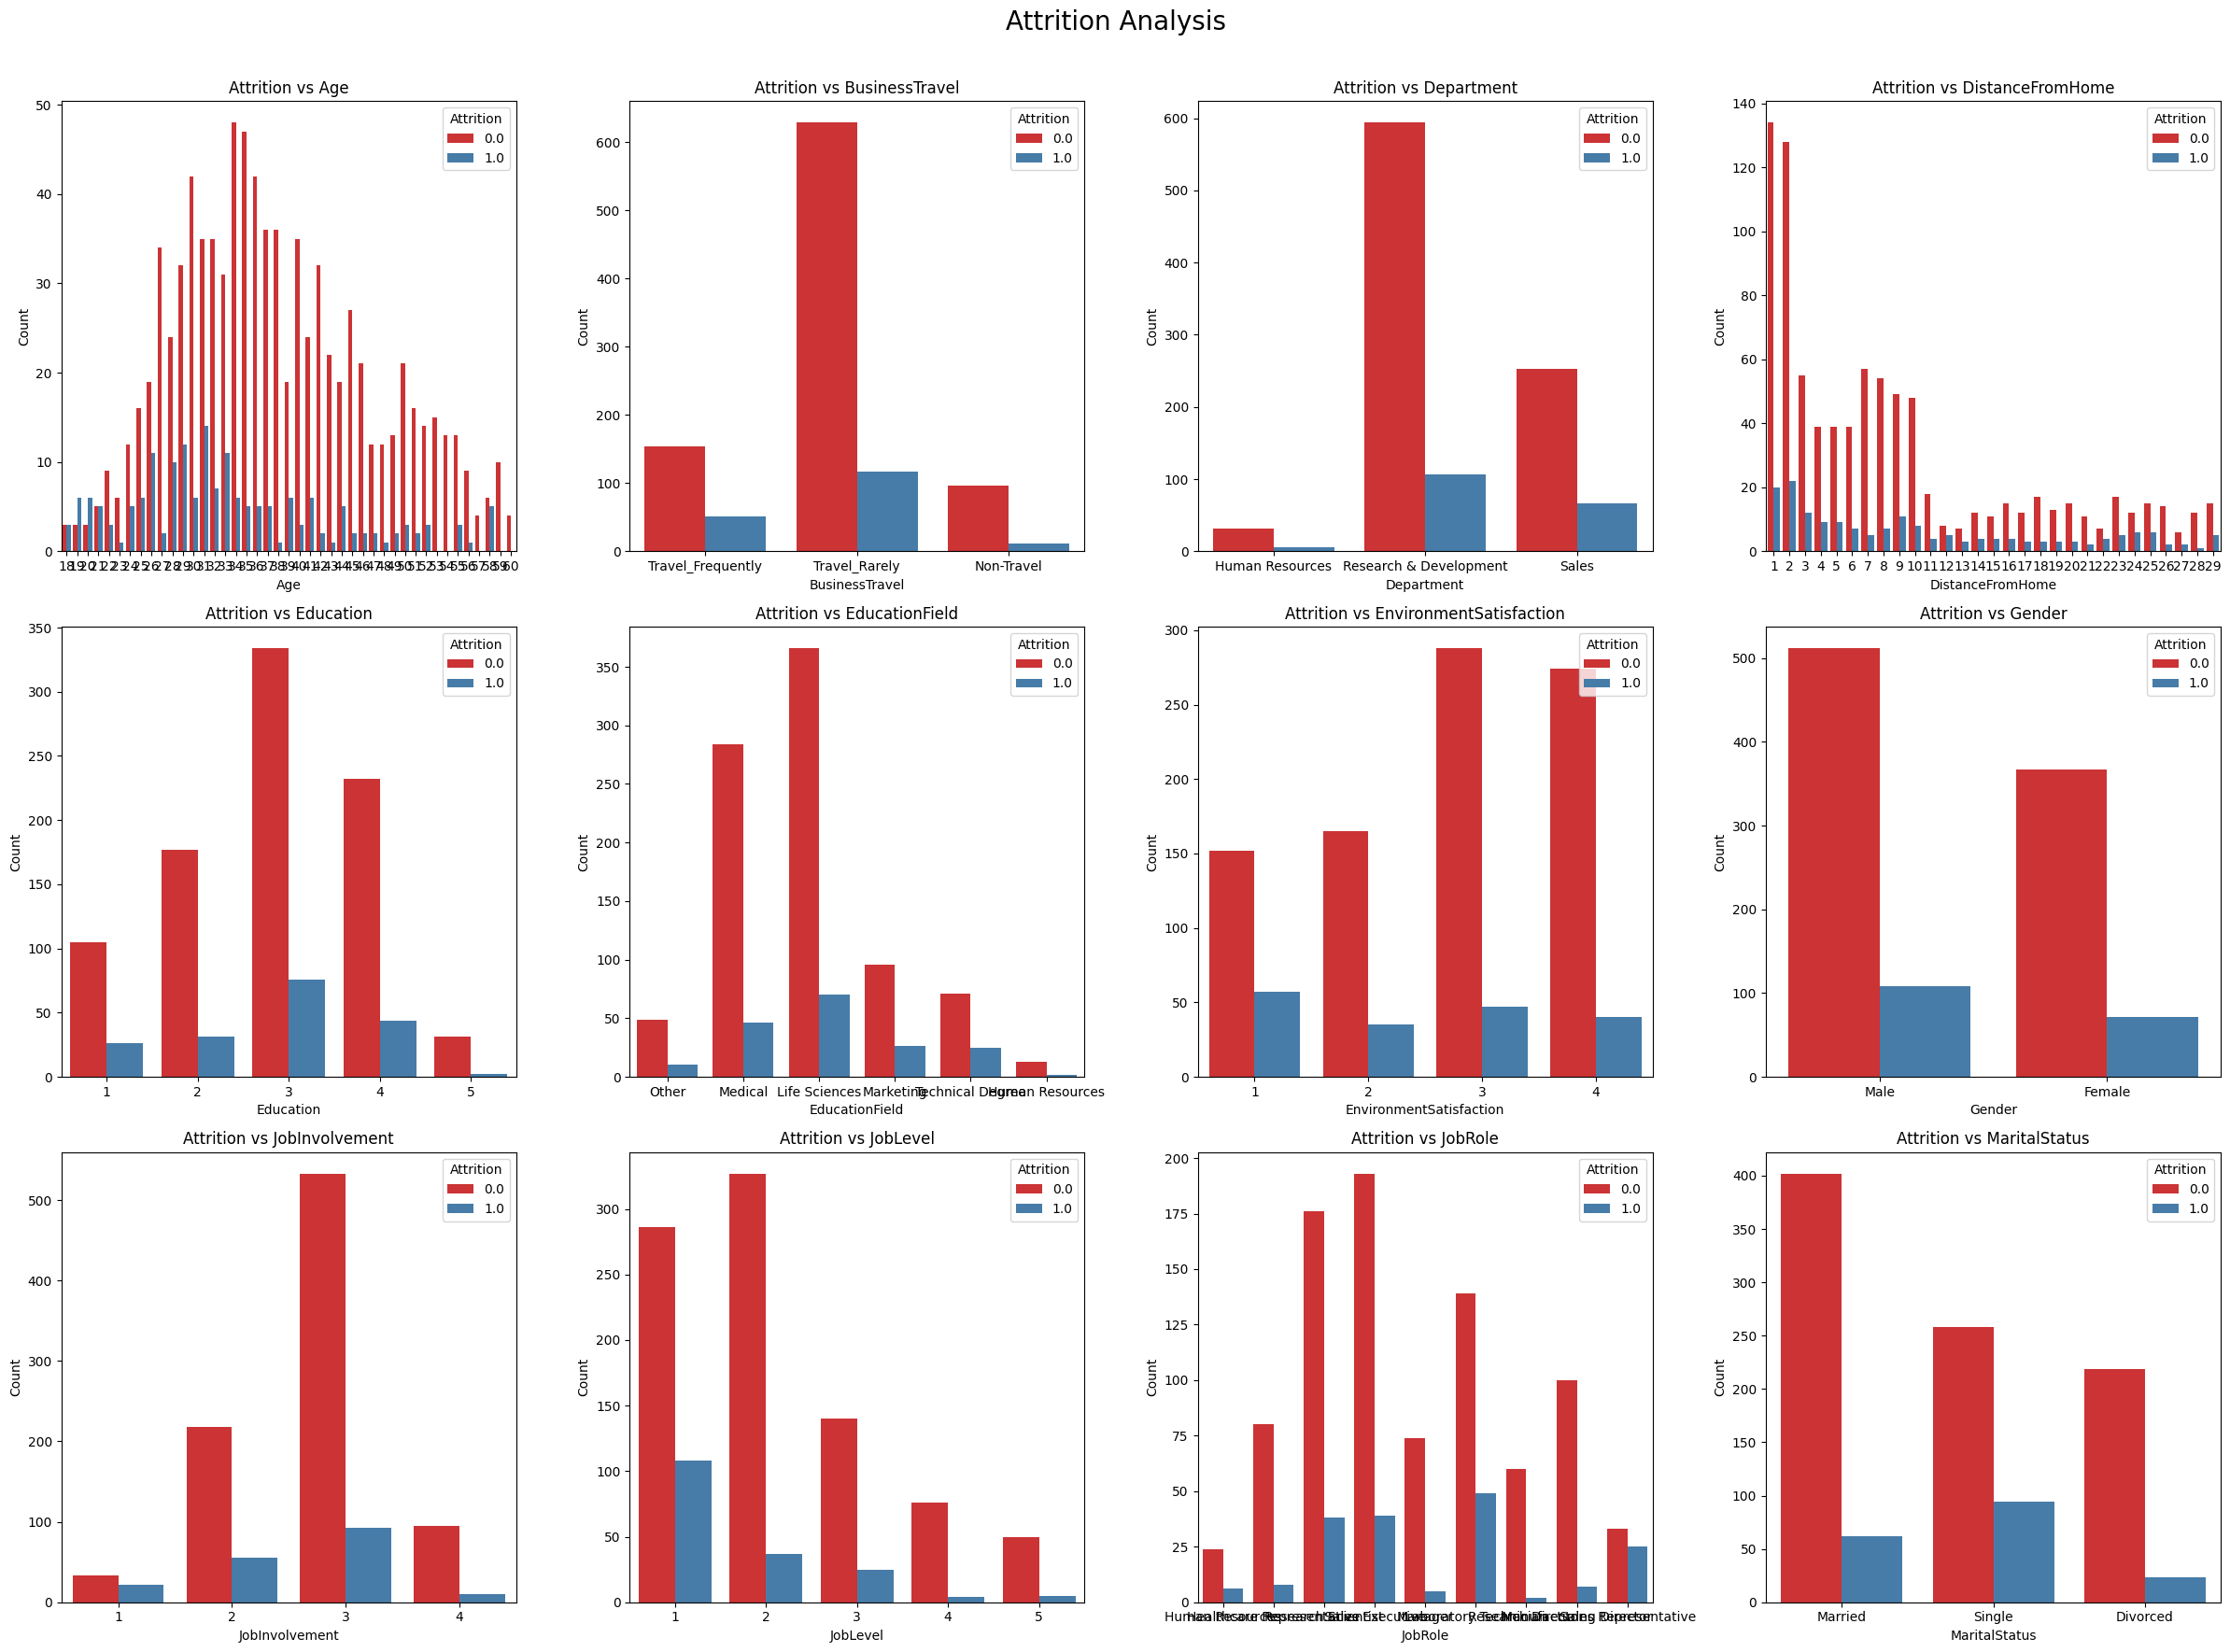

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
fig.suptitle('Attrition Analysis', fontsize=20)

plot_features = [
    ('Age', 'Attrition vs Age'),
    ('BusinessTravel', 'Attrition vs BusinessTravel'),
    ('Department', 'Attrition vs Department'),
    ('DistanceFromHome', 'Attrition vs DistanceFromHome'),
    ('Education', 'Attrition vs Education'),
    ('EducationField', 'Attrition vs EducationField'),
    ('EnvironmentSatisfaction', 'Attrition vs EnvironmentSatisfaction'),
    ('Gender', 'Attrition vs Gender'),
    ('JobInvolvement', 'Attrition vs JobInvolvement'),
    ('JobLevel', 'Attrition vs JobLevel'),
    ('JobRole', 'Attrition vs JobRole'),
    ('MaritalStatus', 'Attrition vs MaritalStatus')
]

for ax, (col, title) in zip(axes.flatten(), plot_features):
    sns.countplot(x=col, hue='Attrition', data=df, palette='Set1', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='Attrition', loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


 Analisis Attrition Berdasarkan Berbagai Fitur


<details>
<summary><b>1. Attrition vs Age</b></summary>

- Karyawan usia muda (akhir 20-an hingga awal 30-an) lebih rentan mengalami attrition.
- Semakin bertambah usia, tingkat attrition cenderung menurun, menandakan stabilitas dan komitmen lebih tinggi pada karyawan senior.

</details>

<details>
<summary><b>2. Attrition vs BusinessTravel</b></summary>

- Proporsi attrition tertinggi pada karyawan yang sering perjalanan dinas (Travel_Frequently).
- Karyawan yang jarang atau tidak pernah dinas memiliki tingkat attrition lebih rendah. Perjalanan dinas yang sering bisa menjadi faktor stres.

</details>

<details>
<summary><b>3. Attrition vs Department</b></summary>

- Departemen Sales memiliki proporsi attrition tertinggi.
- Human Resources juga cukup tinggi secara proporsional meski jumlahnya sedikit.
- Research & Development memiliki attrition relatif rendah.

</details>

<details>
<summary><b>4. Attrition vs DistanceFromHome</b></summary>

- Karyawan yang tinggal sangat dekat atau sangat jauh sedikit lebih rentan attrition.
- Jarak rumah bukan faktor tunggal, namun bisa berkontribusi jika dikombinasikan faktor lain.

</details>

<details>
<summary><b>5. Attrition vs Education</b></summary>

- Pendidikan rendah (level 1 dan 2) cenderung lebih tinggi attrition-nya.
- Level Sarjana (3) absolut tertinggi karena jumlahnya banyak, namun proporsional lebih rendah pada level pendidikan tinggi.

</details>

<details>
<summary><b>6. Attrition vs EducationField</b></summary>

- Life Sciences & Medical jumlah attrition absolut tinggi (karena jumlah karyawan besar).
- Proporsional, Human Resources & Technical Degree lebih tinggi attrition-nya.
- Marketing juga cukup terlihat tingkat attrition-nya.

</details>

<details>
<summary><b>7. Attrition vs EnvironmentSatisfaction</b></summary>

- Kepuasan lingkungan kerja rendah (level 1) = proporsi attrition tertinggi.
- Semakin puas, attrition menurun. Lingkungan kerja positif penting untuk retensi.

</details>

<details>
<summary><b>8. Attrition vs Gender</b></summary>

- Laki-laki jumlah attrition absolut lebih tinggi.
- Proporsional, perbedaan tidak signifikan, meski laki-laki sedikit lebih tinggi.

</details>

<details>
<summary><b>9. Attrition vs JobInvolvement</b></summary>

- Keterlibatan kerja rendah (level 1) = attrition tertinggi.
- Semakin terlibat, attrition menurun. Keterlibatan kerja penting untuk loyalitas.

</details>

<details>
<summary><b>10. Attrition vs JobLevel</b></summary>

- Level jabatan rendah (1 & 2) = attrition lebih tinggi.
- Level jabatan naik, attrition menurun. Bisa karena kompensasi & kepuasan kerja lebih baik.

</details>

<details>
<summary><b>11. Attrition vs JobRole</b></summary>

- Sales Representative proporsi attrition sangat tinggi.
- Laboratory Technician & Sales Executive juga cukup tinggi.
- Peran manajerial (Manager, Research Director) attrition lebih rendah.

</details>

<details>
<summary><b>12. Attrition vs MaritalStatus</b></summary>

- Status Single (Lajang) = proporsi attrition tertinggi.
- Married (Menikah) lebih rendah, diikuti Divorced (Cerai). Status pernikahan memengaruhi stabilitas kerja.

</details>



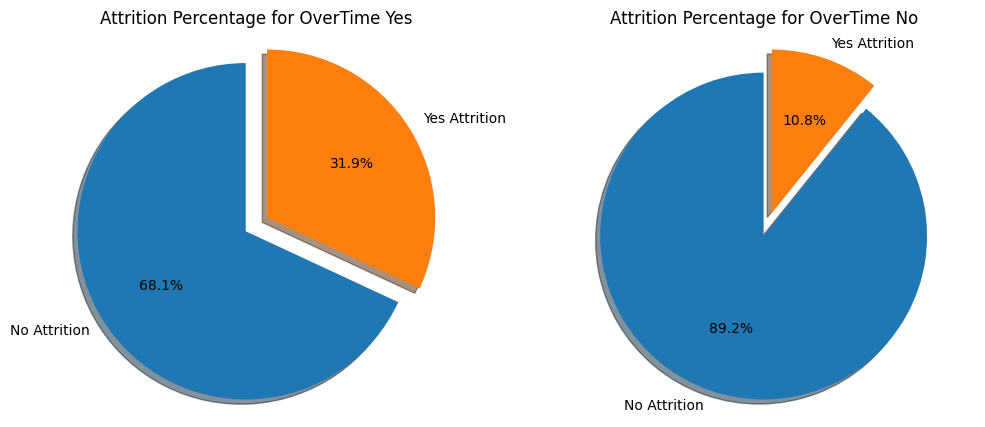

In [27]:
# Menghitung persentase
attrition_overtime = df.groupby(['OverTime', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby(['OverTime']).size().reset_index(name='Total')
attrition_overtime = attrition_overtime.merge(total_counts, on='OverTime')
attrition_overtime['Percentage'] = (attrition_overtime['Count'] / attrition_overtime['Total']) * 100

# Pie chart for OverTime Yes
overtime_yes = attrition_overtime[attrition_overtime['OverTime'] == 'Yes']
# labels_yes = overtime_yes['Attrition']
sizes_yes = overtime_yes['Percentage']
explode_yes = (0.15, 0)  # explode 1st slice for better visualization

# Pie chart for OverTime No
overtime_no = attrition_overtime[attrition_overtime['OverTime'] == 'No']
# labels_no = overtime_no['Attrition']
sizes_no = overtime_no['Percentage']
explode_no = (0.15, 0)  # explode 1st slice for better visualization

# Creating the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the pie chart for OverTime Yes
ax1.pie(sizes_yes, explode=explode_yes, labels=['No Attrition','Yes Attrition'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Attrition Percentage for OverTime Yes')

# Plotting the pie chart for OverTime No
ax2.pie(sizes_no, explode=explode_no, labels=['No Attrition','Yes Attrition'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Attrition Percentage for OverTime No')

# Display the plots
plt.show()

 Insight :

- 31% karyawan yang lembur mengalami attrion.
- 10% karyawan yang tidak lembur mengalami attrion.

## Data Preparation / Preprocessing

In [33]:
# melihat nilai untuk tiap kategori baik numerik maupun kategorik
numeric = df.select_dtypes(exclude=['object']).columns
categoric = df.select_dtypes(include=['object']).columns

print("jumlah kolom numerik", len(numeric))
print("jumlah kolom kategorik", len(categoric))

jumlah kolom numerik 27
jumlah kolom kategorik 8


In [35]:
# Cek Outlier
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    # mulai filter outlier
    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

# Pastikan numeric diubah ke list jika masih berupa Index
pd.DataFrame({
    "Column Name": list(numeric),
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier": outlier,
    "No Outlier": no_outlier
})

Jumlah baris: 1470
Outlier All Data : 1018
Not Outlier All Data : 452



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,EmployeeId,False,-733.500,2204.500,0,1470
1,Age,False,10.500,62.500,0,1470
2,Attrition,True,0.000,0.000,591,879
3,DailyRate,False,-573.000,2195.000,0,1470
4,DistanceFromHome,False,-16.000,32.000,0,1470
5,Education,False,-1.000,7.000,0,1470
6,EmployeeCount,False,1.000,1.000,0,1470
7,EnvironmentSatisfaction,False,-1.000,7.000,0,1470
8,HourlyRate,False,-5.625,137.375,0,1470
9,JobInvolvement,False,0.500,4.500,0,1470


Ada beberapa data yang menunjukkan adanya outliers. Sehingga, perlu melakukan penanganan lebih lanjut dengan menggunakan metode IQR untuk mengatasi masalah ini.

### Data Cleaning

In [36]:
df_clean = df.copy()

In [37]:
df_clean = df_clean.drop(['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

Kolom `EmployeeId`, `EmployeeCount`, `Over18`, dan `StandardHours` dihapus dari data karena tidak memberikan informasi yang bermanfaat untuk analisis atau pemodelan. 

- `EmployeeId` hanya berfungsi sebagai identitas unik karyawan dan tidak berpengaruh terhadap prediksi attrition.
- `EmployeeCount` dan `Over18` memiliki nilai yang sama untuk seluruh baris, sehingga tidak memiliki variasi (konstan) dan tidak membantu dalam membedakan karakteristik karyawan.
- `StandardHours` juga bernilai sama untuk semua karyawan, sehingga tidak memberikan kontribusi dalam analisis.

Menghapus kolom-kolom ini membantu menyederhanakan data dan mencegah model belajar dari fitur yang tidak relevan.

In [40]:
# menghapus mising value
df_clean = df_clean.dropna()
df_clean.isna().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [41]:
# Merubah tipe data untuk kolom atrition menjadi integer
df_clean['Attrition'] = df_clean['Attrition'].astype('int')

In [42]:
# Handle Outliers
numeric = df_clean.select_dtypes(exclude='object').columns

outlier_columns = []

for col in numeric:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_step = 1.5 * IQR
    outlier_list_col = df_clean[(df_clean[col] < Q1 - outlier_step) | (df_clean[col] > Q3 + outlier_step)].index

    if outlier_list_col.any():
        outlier_columns.append(col)

print("Jumlah Kolom:", len(df_clean.columns))
print("Jumlah Kolom Outliers:", len(outlier_columns))

Jumlah Kolom: 31
Jumlah Kolom Outliers: 11


In [43]:
is_outlier = df_clean[outlier_columns].drop(['Attrition', 'PerformanceRating'], axis=1)

print('Jumlah baris sebelum handle outlier :', df_clean.shape[0])
# Iterasi melalui setiap kolom untuk menangani outlier
for column in is_outlier:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan atas outlier
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

    # Menghapus outlier dari DataFrame
    df_outliers = df_clean[(df_clean[column] >= lower_limit) & (df_clean[column] <= upper_limit)]

print('Jumlah baris setelah handle outlier :', df_outliers.shape[0])

Jumlah baris sebelum handle outlier : 1058
Jumlah baris setelah handle outlier : 1046


### Label Encoding

In [44]:
df_encoding = df_clean.copy()

In [45]:
ml =  df_encoding.select_dtypes(include='object').columns

In [47]:
label_encoder = LabelEncoder()

is_label_encoding = df_encoding[ml].columns

for col in is_label_encoding:
      df_encoding[col] = label_encoder.fit_transform(df_encoding[col])

### Drop Fitur

In [48]:
# mengcopy data econding ke model
df_model = df_encoding.copy()

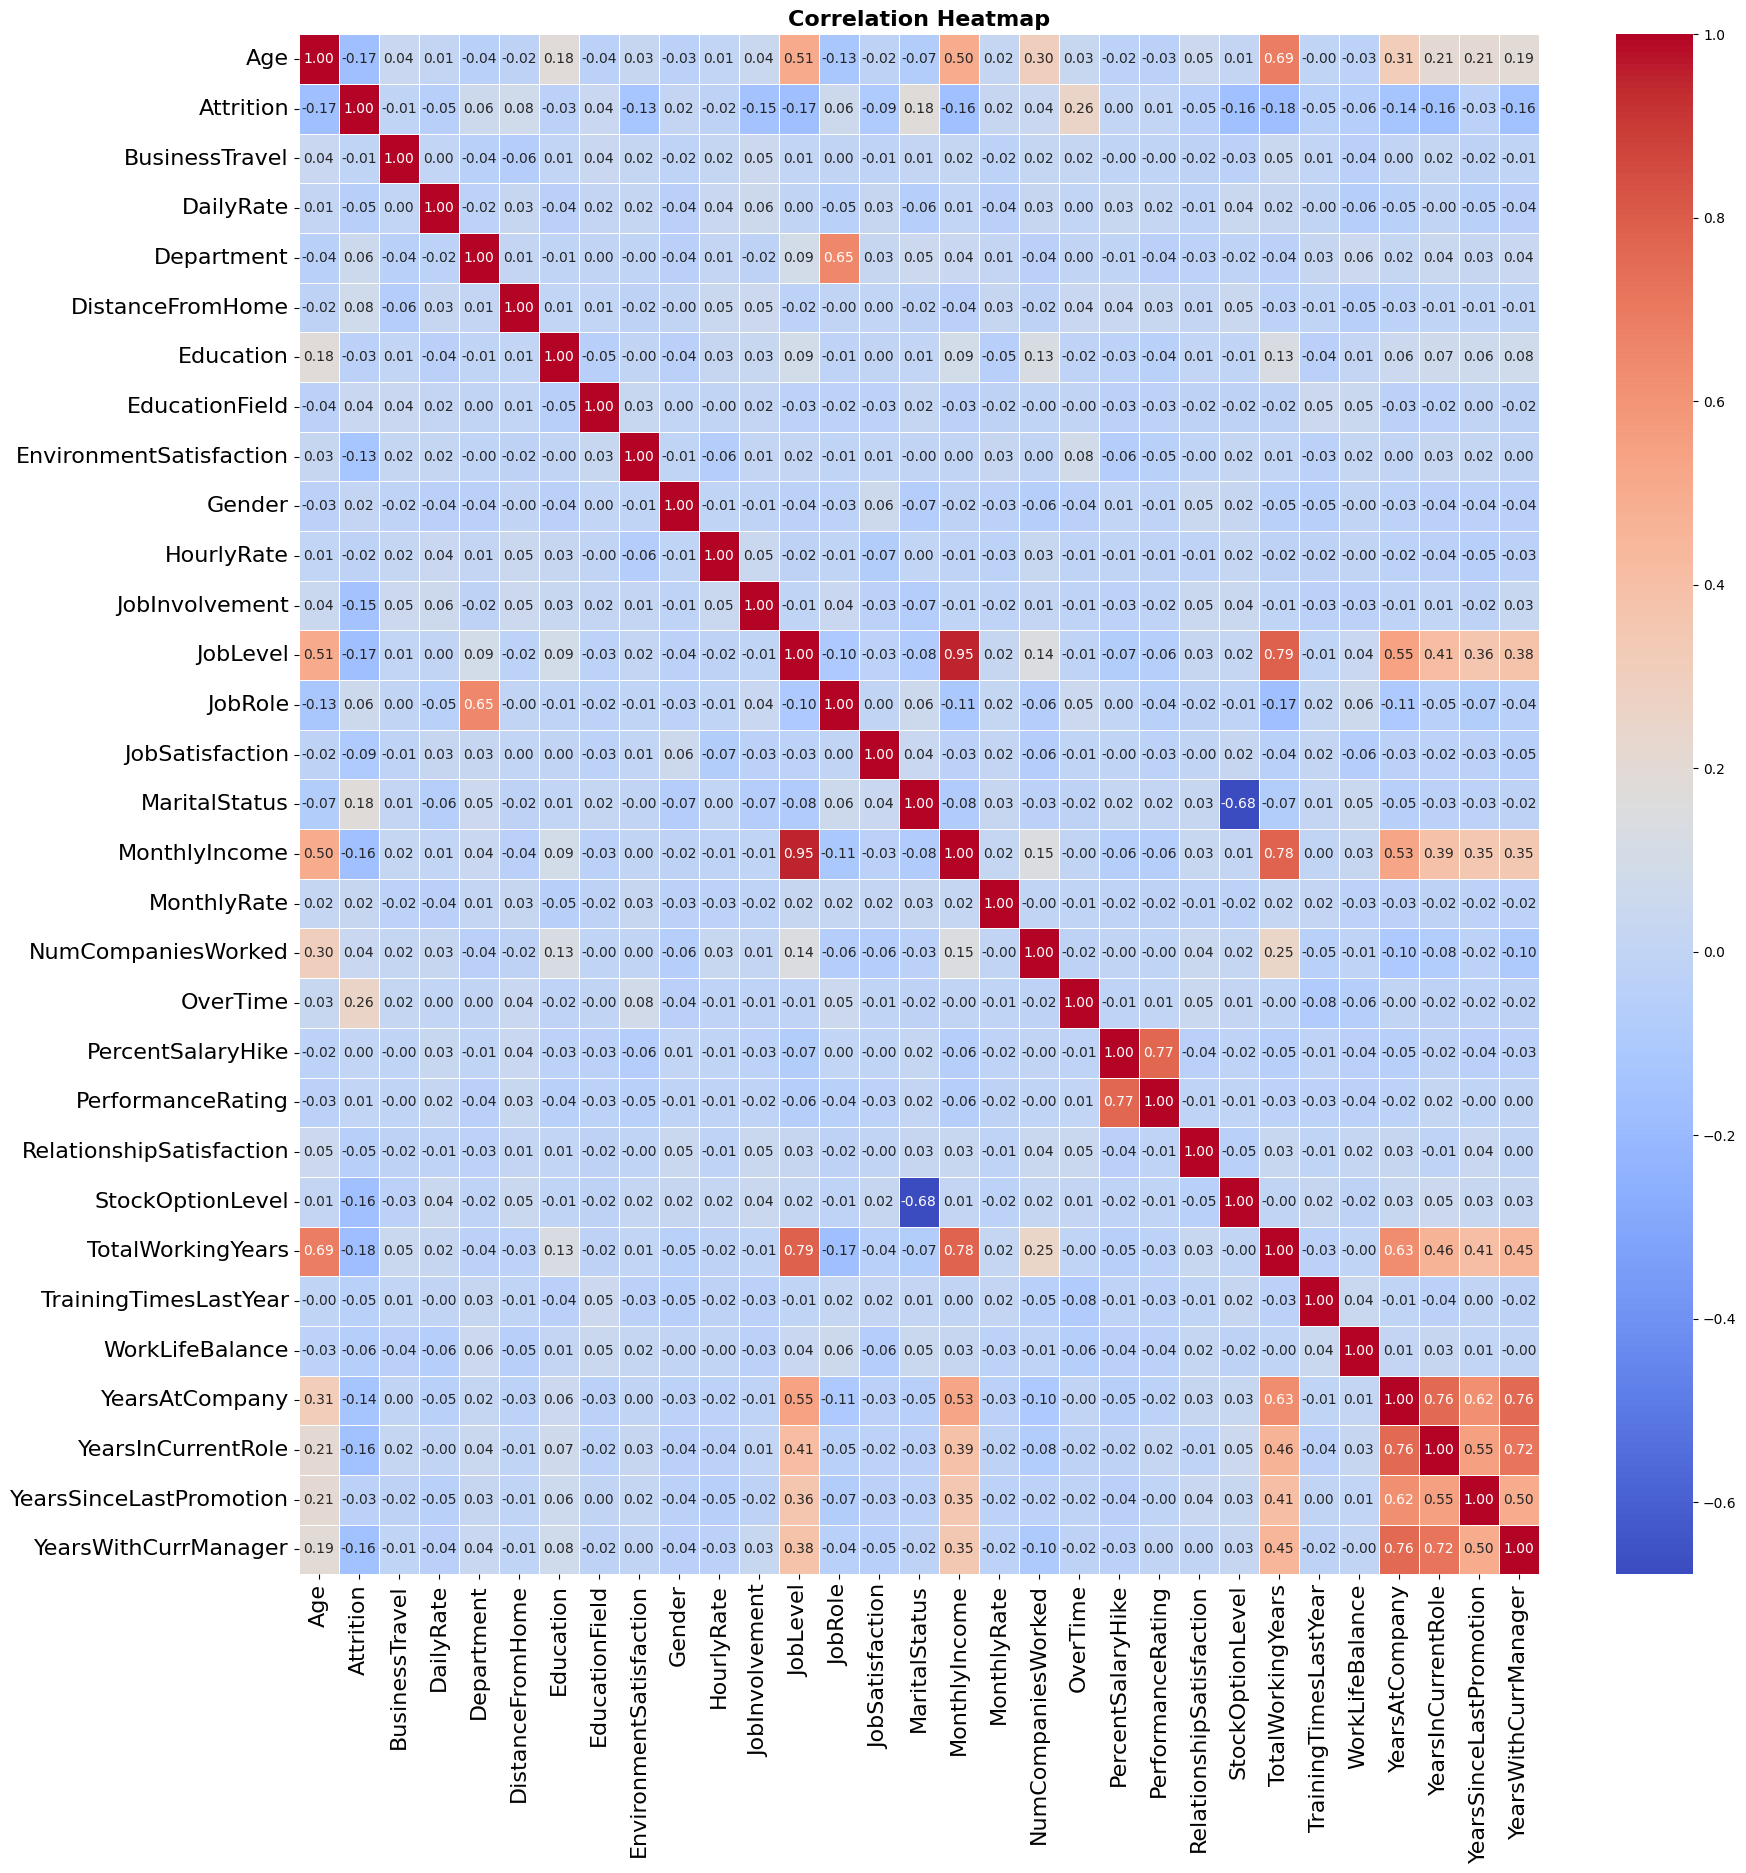

In [49]:
corr = df_model.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.show()

In [50]:
# drop kolom yang tidak diperlukan dan kolom yang memiliki correlation > 0.5
df.drop(columns=['EmployeeId','EmployeeCount','Gender', 'Over18', 'StandardHours','JobLevel','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','PerformanceRating','YearsAtCompany','MonthlyRate','DailyRate','HourlyRate'], inplace=True)
     

### Data Split

In [52]:
# membuat data target 
X = df_model.drop(columns=['Attrition'])
Y = df_model['Attrition']

In [54]:
# membagi data menjadi data train dan data test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training :", X_train.shape)
print("Testing :", X_test.shape)

Training : (846, 30)
Testing : (212, 30)


## Modeling

In [ ]:
# Daftar model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB()
}

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menyimpan metrik untuk semua model
results = []

for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(Y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(Y_test, y_pred, average='weighted', zero_division=0)
    
    # Untuk ROC AUC, perlu prediksi probabilitas dan konversi ke bentuk binary jika multiclass
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)
            if y_proba.shape[1] == 2:
                roc = roc_auc_score(Y_test, y_proba[:, 1])
            else:
                roc = roc_auc_score(Y_test, y_proba, multi_class='ovr')
        else:
            roc = 0.0
    except:
        roc = 0.0
    
    results.append([name, acc, prec, rec, f1, roc])

# Buat DataFrame dari hasil evaluasi
columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC_AUC"]
results_df = pd.DataFrame(results, columns=columns)

# Tampilkan tabel hasil
print(results_df.to_string(index=False))


              Model  Accuracy  Precision   Recall  F1-Score  ROC_AUC
Logistic Regression  0.877358   0.869337 0.877358  0.864244 0.838891
     Decision Trees  0.764151   0.739353 0.764151  0.750122 0.557581
      Random Forest  0.849057   0.872618 0.849057  0.802944 0.785386
            XGBoost  0.858491   0.847910 0.858491  0.834924 0.803765
        Naive Bayes  0.773585   0.814524 0.773585  0.788599 0.753965


### Evaluasi

In [64]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

### Cross Validation

In [66]:
for name, model in models.items():
    # Cross validation score
    Y_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='f1')

    # cetak rata-rata skor
    print(f"Rata-rata skor {name}:", round(np.mean(Y_scores), 2))

Rata-rata skor Logistic Regression: 0.66
Rata-rata skor Decision Trees: 0.91
Rata-rata skor Random Forest: 0.97
Rata-rata skor XGBoost: 0.96
Rata-rata skor Naive Bayes: 0.73


In [67]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(random_state=42)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier(random_state=42)

# Random Forest
models['Random Forest'] = RandomForestClassifier(random_state=42)

# XGBoost
models['XGBoost'] = XGBClassifier(random_state=42)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

Classification Report model Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       178
           1       0.64      0.64      0.64       174

    accuracy                           0.64       352
   macro avg       0.64      0.64      0.64       352
weighted avg       0.64      0.64      0.64       352



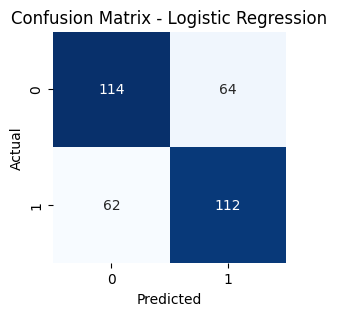

Classification Report model Decision Trees:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       178
           1       0.83      0.98      0.89       174

    accuracy                           0.89       352
   macro avg       0.90      0.89      0.89       352
weighted avg       0.90      0.89      0.89       352



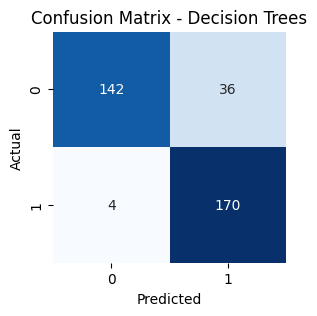

Classification Report model Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       178
           1       0.96      0.96      0.96       174

    accuracy                           0.96       352
   macro avg       0.96      0.96      0.96       352
weighted avg       0.96      0.96      0.96       352



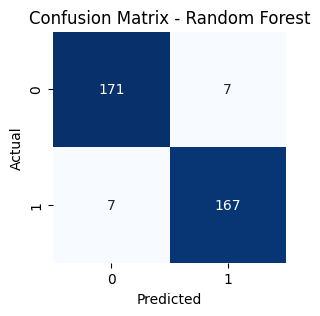

Classification Report model XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       178
           1       0.93      0.97      0.95       174

    accuracy                           0.95       352
   macro avg       0.95      0.95      0.95       352
weighted avg       0.95      0.95      0.95       352



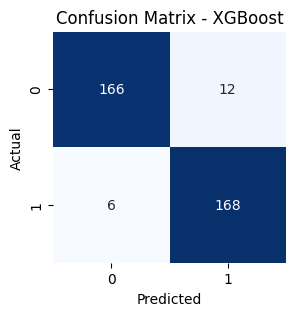

Classification Report model Naive Bayes:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       178
           1       0.65      0.76      0.70       174

    accuracy                           0.68       352
   macro avg       0.69      0.68      0.68       352
weighted avg       0.69      0.68      0.68       352



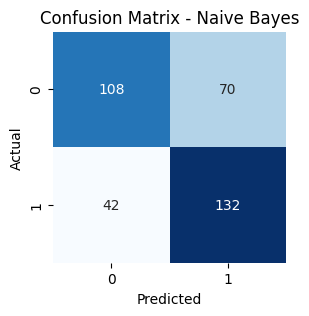

Model terbaik: RandomForestClassifier(random_state=42)


In [68]:
best_model = None
best_accuracy = 0
for name, model in models.items():
    # Melakukan train setiap model
    model.fit(X_train, Y_train)

    # Melakukan prediksi model
    predict = model.predict(X_test)

    # Best Model
    accuracy = accuracy_score(Y_test, predict)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Classification Report
    print(f"Classification Report model {name}:")
    print(classification_report(Y_test, predict))

    # Confusion Matrix
    cm = confusion_matrix(Y_test, predict)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print(f"Model terbaik: {best_model}")

## Save Model

In [69]:
# Save Model
filename = 'result_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)